<!--Información del curso-->
<img align="left" style="padding-right:10px;" src="figuras/logo_ciencia_datos.png">

 
<center><h2 style="font-size:2em;color:#840700">   Caso de estudio: Ventas </h4></center>

<br>
<table>
<col width="550">
<col width="450">
<tr>
<td><img src="figuras/ventas.jpg" align="left" style="width:400px"/></td>
<td>

* **Wes McKinney**, empezó a desarrollar Pandas en el año 2008 mientras trabajaba en *AQR Capital* [https://www.aqr.com/] por la necesidad que tenía de una herramienta flexible de alto rendimiento para realizar análisis cuantitativos en datos financieros. 
* Antes de dejar AQR convenció a la administración de la empresa de distribuir esta biblioteca bajo licencia de código abierto.
* **Pandas** es un acrónimo de **PANel DAta analysiS**
   
    
<br>
</td>
</tr>
</table>

## Integrantes

Nombre 1: María de Guadalupe Ortega Perera

Nombre 2: Enrique Yair Castellanos Gutiérrez

In [17]:
#librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob

### Ejercicio

Utilzar los archivos "datos/ventas/*.txt" para contestar las siguientes preguntas. A continuación el código propuesto para obtener el dataframe:

```python
files = glob('datos/Ventas/*.txt')
df =  pd.concat((pd.read_csv(file) for file in files))
df=df.dropna(axis='rows',how='any')
df=df[df['Quantity Ordered']!='Quantity Ordered'] 
```

<div class="alert alert-success">
    
0. Explicar que hace el código de arriba
    
</div> 

Inicialmente abre todos los archivos con extensión .txt dentro de la carpeta ventas en la carpeta datos, concatena todos los archivos para crear un dataframe y seguidamente elimina todas las filas que contengan datos faltantes, y finalmente filtra el dataframe para que no se tomen en cuenta las filas en las que no existen datos de compra.

In [18]:
files = glob.glob('datos/Ventas/*.txt')
df =  pd.concat((pd.read_csv(file) for file in files))
df=df.dropna(axis='rows',how='any')
df=df[df['Quantity Ordered']!='Quantity Ordered']

<div class="alert alert-success">
    
1. Encuentre el número de productos que se adquirieron en Los Angeles, CA
    
</div> 

In [5]:
df.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address'],
      dtype='object')

In [15]:
df_LA = df[df['Purchase Address'].str.contains('Los Angeles', case=False)]
total = df_LA['Quantity Ordered'].astype(int).sum()
print('La cantidad de productos adquiridos desde LA es =', total)

La cantidad de productos adquiridos desde LA es = 33289


<div class="alert alert-success">
    
2. ¿Cuántos iPhone se vendieron?

    
</div> 

In [38]:
df_iphone=df[df['Product']=='iPhone']
print('Total de iPhone vendidos =', df_iphone['Quantity Ordered'].astype(int).sum())

Total de iPhone vendidos = 6849


<div class="alert alert-success">
    
3. ¿Cuánto fue su ganancia por venta de baterías? 
    
</div> 

In [35]:
df_batteries = df[df['Product'].str.contains('Batteries', case=False)].copy()
df_batteries['Total'] = df_batteries['Quantity Ordered'].astype(int) * df_batteries['Price Each'].astype(float)
print('Ganancia por venta de baterías =', df_batteries['Total'].sum())

Ganancia por venta de baterías = 198859.23


<div class="alert alert-success">
    
4. ¿Cuál fue el código postal que más ordenes realizó?

    
</div> 

In [69]:
df['Postal Code'] = df['Purchase Address'].str.split(' ').str[-1].str.strip()
df['Postal Code'].value_counts().reset_index().loc[0]

Postal Code    94016
count          44732
Name: 0, dtype: object

<div class="alert alert-success">
    
5.  a) ¿Cuál fue el producto con más ganancias?
    
    b) ¿Cuál fue el producto con más unidades vendidas?

    
</div> 

In [87]:
# a) ¿Cuál fue el producto con más ganancias?
df['Total'] = df['Quantity Ordered'].astype(int) * df['Price Each'].astype(float)
df.groupby('Product')['Total'].sum().sort_values(ascending=False).reset_index().loc[0]

Product    Macbook Pro Laptop
Total               8037600.0
Name: 0, dtype: object

In [93]:
# b) ¿Cuál fue el producto con más unidades vendidas?
df['Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered'], errors='coerce')
df.groupby('Product')['Quantity Ordered'].sum().sort_values(ascending=False).reset_index().loc[0]

Product             AAA Batteries (4-pack)
Quantity Ordered                     31017
Name: 0, dtype: object

<div class="alert alert-success">
    
6. ¿Cuales son los 5 productos más vendidos?     
</div> 

In [91]:
df['Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered'], errors='coerce')
df.groupby('Product')['Quantity Ordered'].sum().sort_values(ascending=False).reset_index().iloc[:5]

,Product,Quantity Ordered
0,AAA Batteries (4-pack),31017
1,AA Batteries (4-pack),27635
2,USB-C Charging Cable,23975
3,Lightning Charging Cable,23217
4,Wired Headphones,20557


<div class="alert alert-success">
    
7.  ¿Cuales son los 5 productos con las ganancias más altas?

    
</div> 

In [94]:
df['Total'] = df['Quantity Ordered'].astype(int) * df['Price Each'].astype(float)
df.groupby('Product')['Total'].sum().sort_values(ascending=False).reset_index().iloc[:5]

,Product,Total
0,Macbook Pro Laptop,8037600.00
1,iPhone,4794300.00
2,ThinkPad Laptop,4129958.70
3,Google Phone,3319200.00
4,27in 4K Gaming Monitor,2435097.56


<div class="alert alert-success">
    
8. ¿A qué hora recomendaría mostrar anuncios para maximizar la probabilidad de que el cliente compre un producto?     
</div> 

In [19]:
#Convirtiendo la columna 'Order Date' y colocándola como el índice
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%m/%d/%y %H:%M')
df = df.set_index('Order Date')

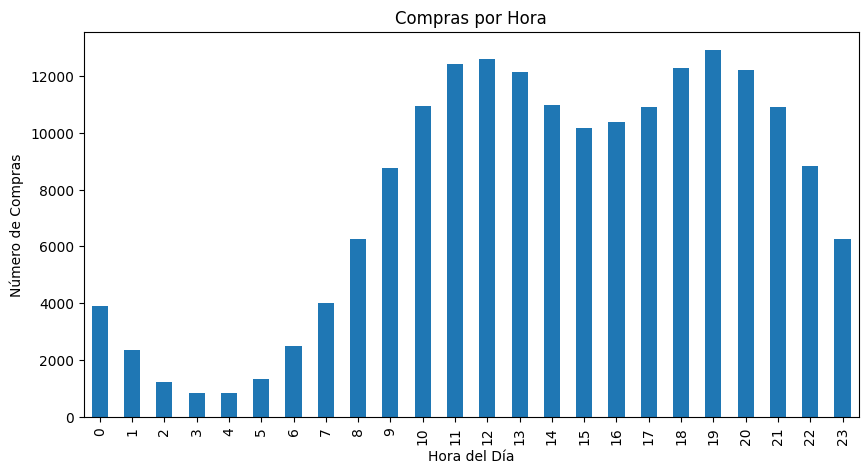

In [31]:
compras_hora=df.groupby(df.index.hour).size()
compras_hora.plot(kind='bar', figsize=(10, 5))
plt.title('Compras por Hora')
plt.xlabel('Hora del Día')
plt.ylabel('Número de Compras')
plt.show()

Observando la gráfica, es posible notar que las horas más activas en la tienda son las 12 del día y las 7 de la noche, mostrar anuncios a esas horas podría maximizar la probabilidad de que el cliente compre un producto.

<div class="alert alert-success">
    
 9. 
    a) ¿Cuál es el día de más ganancias por cada mes?
    
    b) ¿Cuál es el mes con más ganancias y el de menos ganancias?
    
</div> 

In [73]:
# a) ¿Cuál es el día de más ganancias por cada mes?
df['Total'] = df['Quantity Ordered'].astype(int) * df['Price Each'].astype(float)
ganancias_dia = df['Total'].resample('d').sum()
ganancias_mes = ganancias_dia.groupby(ganancias_dia.index.month).idxmax().dt.strftime('%d-%b')
ganancias_mes

Order Date
1     11-Jan
2     08-Feb
3     22-Mar
4     24-Apr
5     26-May
6     09-Jun
7     21-Jul
8     10-Aug
9     09-Sep
10    06-Oct
11    24-Nov
12    04-Dec
Name: Total, dtype: object

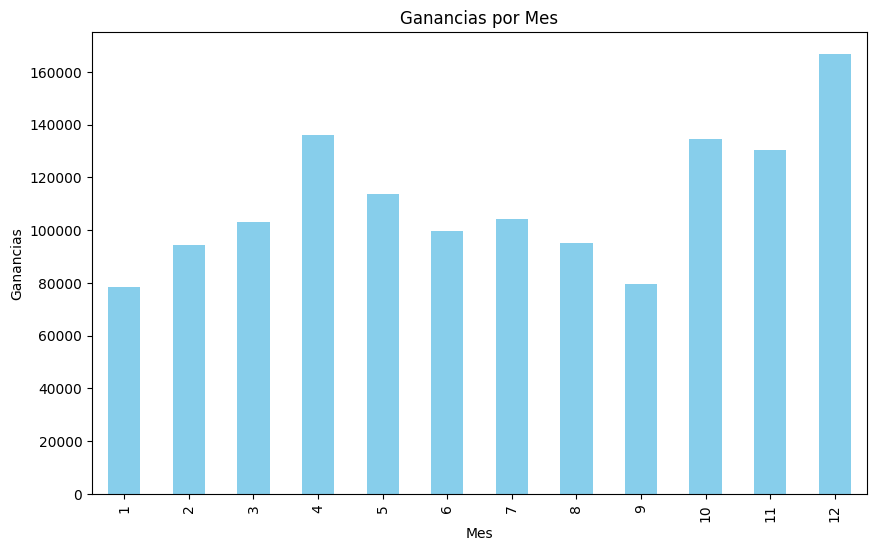

In [76]:
# b) ¿Cuál es el mes con más ganancias y el de menos ganancias?
ganancias_mes = ganancias_dia.groupby(ganancias_dia.index.month).max()
plt.figure(figsize=(10, 6))
ganancias_mes.plot(kind='bar', color='skyblue')
plt.title('Ganancias por Mes')
plt.xlabel('Mes')
plt.ylabel('Ganancias')
plt.show()

<div class="alert alert-success">
    
10. ¿Cuál fue el producto más comprado en San Francisco, CA
    
</div> 

In [103]:
df_fco = df[df['Purchase Address'].str.contains('San Francisco', case=False)].copy()
df_fco['Quantity Ordered'] = pd.to_numeric(df_fco['Quantity Ordered'], errors='coerce')
df_fco.groupby('Product')['Quantity Ordered'].sum().sort_values(ascending=False).reset_index().iloc[0]

Product             AAA Batteries (4-pack)
Quantity Ordered                      7408
Name: 0, dtype: object

<div class="alert alert-success">
    
11. Escribir una conclusión del ejercicio (ventajas de usar pandas, herramientas mas utilizadas en este ejercicio, etc). 
    
</div> 

Realizando los ejercicios pusimos en práctica conocimientos adquiridos de los temas visto hasta ahora. Empleando Pandas el manejo de los datos y las operaciones realizadas en ellos es más fácil; también se hizo uso de una nueva librería (glob), con la que fue posible encontrar los archivos que coincidan con el patrón especificado; así mismo se realizaron diferentes operaciones de agrupación y ordenamiento para obtener datos específicos, y en algunos casos se graficaron para una mejor visualización.